In [6]:
import numpy as np
import math
import pdb
import csv
import cv2
import sys
import random
#
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers import Cropping2D
# Fix error with TF and Keras
import tensorflow as tf
tf.python.control_flow_ops = tf
#
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [3]:
## Global Config Data
DATADIR = "./data/data/"
DRIVING_LOG_FILE = DATADIR + "/driving_log.csv"
IMGDIR = DATADIR + "/IMG/"

4435 8036
./data/data/IMG/center_2016_12_01_13_40_07_838.jpg


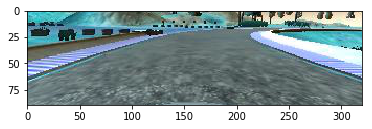

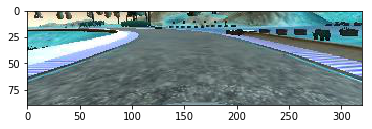

In [11]:
def getInputSamples():
    """ Reads the contents of the
    driving log file and returns a
    list of tuples containing the image
    and steering angle
    """
    samples = []
    with open(DRIVING_LOG_FILE, "r") as dlfile:
        dlreader = csv.reader(dlfile)
        skipHeader = True
        for line in dlreader:
            if skipHeader:
                skipHeader = False
                continue
            samples.append((line[0], line[3]))
    return samples

def cropImage(img):
    return img[50:140, 0:320]

###

samples = getInputSamples()
ri = random.randint(0, len(samples))
print(ri, len(samples))
ifile = DATADIR + samples[ri][0]
print(ifile)
img = cv2.imread(ifile)
flimg = np.fliplr(img)
fig = plt.figure()
plt.imshow(cropImage(img))
fig = plt.figure()
plt.imshow(cropImage(flimg))